In [15]:
import torch
import torchvision
import torchvision.transforms as transforms

In [16]:
transform   = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset    = torchvision.datasets.CIFAR10(root = './data', train =True, download = True, transform = transform)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 2)
testset     = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)
testLoader  = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle = True, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [17]:
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np

  car  ship truck  deer


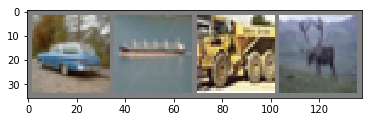

In [18]:
def imgshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter       = iter(trainLoader)
images, labels = dataiter.next()

imgshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(0,4)))

In [19]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1   = nn.Conv2d(3, 6, 5)
        self.pool    = nn.MaxPool2d(2, 2)
        self.conv2   = nn.Conv2d(6, 16, 5)
        self.fc1     = nn.Linear(16 *5 *5, 120)
        self.fc2     = nn.Linear(120, 84)
        self.fc3     = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [20]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)
print(device)
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainLoader, 0):
        inputs, labels = data
        inputs  = inputs.to(device)
        labels  = labels.to(device)
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss    = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print("Training completed")

cuda:0
[1,  2000] loss: 2.176
[1,  4000] loss: 1.874
[1,  6000] loss: 1.715
[1,  8000] loss: 1.642
[1, 10000] loss: 1.554
[1, 12000] loss: 1.494
[2,  2000] loss: 1.411
[2,  4000] loss: 1.386
[2,  6000] loss: 1.356
[2,  8000] loss: 1.321
[2, 10000] loss: 1.314
[2, 12000] loss: 1.268
[3,  2000] loss: 1.232
[3,  4000] loss: 1.214
[3,  6000] loss: 1.186
[3,  8000] loss: 1.193
[3, 10000] loss: 1.192
[3, 12000] loss: 1.146
[4,  2000] loss: 1.094
[4,  4000] loss: 1.112
[4,  6000] loss: 1.096
[4,  8000] loss: 1.118
[4, 10000] loss: 1.091
[4, 12000] loss: 1.088
[5,  2000] loss: 1.010
[5,  4000] loss: 1.029
[5,  6000] loss: 1.046
[5,  8000] loss: 1.040
[5, 10000] loss: 1.035
[5, 12000] loss: 1.036
[6,  2000] loss: 0.956
[6,  4000] loss: 0.964
[6,  6000] loss: 0.956
[6,  8000] loss: 0.962
[6, 10000] loss: 1.005
[6, 12000] loss: 0.987
[7,  2000] loss: 0.890
[7,  4000] loss: 0.932
[7,  6000] loss: 0.917
[7,  8000] loss: 0.935
[7, 10000] loss: 0.933
[7, 12000] loss: 0.957
[8,  2000] loss: 0.853
[8, 

GroundTruth:    car  horse    cat   deer 


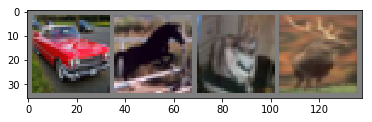

In [24]:
dataiter = iter(testLoader)
images, labels = dataiter.next()

imgshow(torchvision.utils.make_grid(images))
print("GroundTruth: ", ' '.join('%5s ' % classes[labels[j]] for j in range(4)))

In [31]:
correct = 0
total   = 0
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        outputs        = net(images.to(device))
        _, predicted   = torch.max(outputs.data, 1)
        total        += labels.size(0)
        correct      += (predicted == labels.to(device)).sum().item()
print("Accuracy of the network is %d %%" % (100*correct/total))

Accuracy of the network is 70 %
